* Alumna: Andrea Jiménez Zúñiga 
* Centro: CUNEF 
* Estudios: Master en Data Science para Finanzas.

# TAREA FINAL: Datos de vivienda

<p> El negocio inmobiliario es uno de los motores de la economía de España, el carácter turístico de nuesta península hace que sean muchos los inversores extranjeros que se decidan por buscar una inversión de bajo riesgos en nuestras ciudades costeras o grandes urbes. 
Muchas de estas inversiones se hacen sobre grandes bolsas de inmuebles que deben ser analizados previamente para comprobar la rentabilidad del porfolio </p>

<!-- <p> En este caso vamos a trabajar con una tabla que contienen información de distintos inmuebles repartidos por una zona específica, sus carácterísticas y su precio </p>  -->

Todas las cuestiones se deben realizar sobre el conjunto de casos que representen viviendas ubicadas en zonas residenciales **(alta, media y baja densidad)**

**MUY IMPORTANTE:** En las otras prácticas he detectado colaboraciones involucrando varias personas y he sido flexible aunque a algunos os lo he mencionado en las correcciones, porque al final el trabajo de analista de datos es un trabajo colaborativo. Sin embargo, este trabajo es individual, así que cuidado con las colaboraciones.

Las variables de las que se compone el dataset son:

|NOMBRE VARIABLE|DESCRIPTOR|VALORES|
| --- | --- | --- |
|Order|Variable de identificación|1 a 2930|
|MS Zoning|Zona de ubicación de la vivienda|"A rural, C comercial, FV residencial flotante, I industrial, RH residencial alta densidad, RL residencial baja densidad, RM residencial media densidad"|
|Lot Frontage|Longitud de la fachada en pies||
|Lot Area|Superficie de la vivienda en pies cuadrados||
|Land Contour|Contorno del terreno circundante|"Lvl llano, Bnk Tipo bancal, HLS Ladera, Low Depresión"|
|Land Slope|Tipo de pendiente de la vivienda|" Gtl pendiente suave, Mod pendiente moderada, Sev fuerte pendiente"|
|Overall Qual|Grado de calidad de materiales y acabado de la vivienda|De 1 (Muy pobre) a 10 (Excelente)|
|Year Built|Año de construccion de la vivienda||
|Year Remod/Add|Año de última reforma de la vivienda||
|Mas Vnr Type|Tipo de revestimiento exterior|" BrkCmn Ladrillo normal, BrkFace Ladrillo visto, CBlock Bloque de cemento, None Ninguna, Stone Piedra "|
|Exter Qual|Calidad de revestimiento exterior|"Ex Excelente,Gd Bueno,TA Media,Fa Justo"|
|Bsmt Cond|Estado general del sótano|"Ex Excelente, Gd Bueno, TA Media, Fa Justo, Po Pobre,Ss sin sótano"|
|Total Bsmt SF|Superficie del sótano en pies cuadrados|
|Heating QC|Calidad de la calefacción|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Po Pobre"|
|Central Air|Aire acondicionado centralizado|"N No Y Sí"|
|Full Bath|Número de baños completo en planta||
|Half Bath|Número de aseos en planta||
|Bedroom AbvGr|Número de dormitorios en planta||
|Kitchen AbvGr|Número de cocinas en planta||
|Kitchen Qual|Calidad de cocinas|"Ex ExcelenBueno,TA Media,Fa Justo,Po Pobre"|
|TotRms AbvGrd|Número total de habitaciones excluidos los cuartos de baño||
|Garage Cars|Número de plazas de garaje||
|Garage Area|Superficie del garaje|||te,Gd 
|Garage Cond|Estado del garaje|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Po Pobre,Sg sin garaje"|
|Pool Area|Superficie de la piscina en pies cuadrados|
|Pool QC|Calidad de la piscina|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Sp no hay piscina"|
|Mo Sold|mes de venta||
|Yr Sold|año de venta||
|SalePrice|precio de venta en dólares||

Recomiendo al leer los datos, eliminar espacios de los nombres de las columnas, realiza un pequeño análisis inicial de los mismos. No olvides fijarte en los tipos de variables, que variables pueden tener tipos confundidos y corrige los. Sobre todo, trabaja con las fechas.

**NOTA:** Las tareas complementarias sirven para subir nota. El resto de preguntas valen igual y suman 10 puntos.

## Inicializar y cargar el contexto spark

In [1]:
# Librerias que voy a necesitar para inicializar spark, incluyendo el resto de librerias que voy a necesitar
# a lo largo del ejercicio.

import re
from pyspark.sql import functions as f
from pyspark.sql import Row
import numpy as np
import pandas as pd
from pyspark import SparkContext
pd.options.display.max_columns = None 
pd.options.display.max_rows = None 
from pyspark.sql import SQLContext
sc= SparkContext()
from pyspark.sql.functions import desc
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)


from pyspark.sql import Row

sc = SparkContext.getOrCreate()
spark = SparkSession(sc)

In [2]:
import xlrd
import pandas as pd

xl = pd.ExcelFile("BDpracticafinal2021.xlsx")
xl.parse(xl.sheet_names[0])

Order MS Zoning  Lot Frontage  Lot Area Land Contour Land Slope  \
0         1        RL         141.0     31770          Lvl        Gtl   
1         2        RH          80.0     11622          Lvl        Gtl   
2         3        RL          81.0     14267          Lvl        Gtl   
3         4        RL          93.0     11160          Lvl        Gtl   
4         5        RL          74.0     13830          Lvl        Gtl   
5         6        RL          78.0      9978          Lvl        Gtl   
6         7        RL          41.0      4920          Lvl        Gtl   
7         8        RL          43.0      5005          HLS        Gtl   
8         9        RL          39.0      5389          Lvl        Gtl   
9        10        RL          60.0      7500          Lvl        Gtl   
10       11        RL          75.0     10000          Lvl        Gtl   
11       12        RL           NaN      7980          Lvl        Gtl   
12       13        RL          63.0      8402          Lvl        Gtl   
13       14        RL          85.0     10176          Lvl        Gtl   
14       15        RL           NaN      6820          Lvl        Gtl   
15       16        RL          47.0     53504          HLS        Mod   
16       17        RL         152.0     12134          Bnk        Mod   
17       18        RL          88.0     11394          Lvl        Gtl   
18       19        RL         140.0     19138          Lvl        Gtl   
19       20        RL          85.0     13175          Lvl        Gtl   
20       21        RL         105.0     11751          Lvl        Gtl   
21       22        RL          85.0     10625          Lvl        Gtl   
22       23        FV           NaN      7500          Lvl        Gtl   
23       24        RL           NaN     11241          Lvl        Gtl   
24       25        RL           NaN     12537          Lvl        Gtl   
25       26        RL          65.0      8450          Lvl        Gtl   
26       27        RL          70.0      8400          Lvl        Gtl   
27       28        RL          70.0     10500          Lvl        Gtl   
28       29        RH          26.0      5858          Lvl        Gtl   
29       30        RM          21.0      1680          Lvl        Gtl   
30       31        RM          21.0      1680          Lvl        Gtl   
31       32        RM          21.0      1680          Lvl        Gtl   
32       33        RL          53.0      4043          Lvl        Gtl   
33       34        RL          24.0      2280          Lvl        Gtl   
34       35        RL          24.0      2280          Lvl        Gtl   
35       36        RL          24.0      2280          Lvl        Gtl   
36       37        RL         102.0     12858          Lvl        Gtl   
37       38        RL          98.0     11478          Lvl        Gtl   
38       39        RL          83.0     10159          Lvl        Gtl   
39       40        RL          94.0     12883          Lvl        Gtl   
40       41        RL          95.0     12182          Lvl        Gtl   
41       42        RL          90.0     11520          Lvl        Gtl   
42       43        RL          79.0     14122          Lvl        Gtl   
43       44        RL          70.0     10171          Lvl        Gtl   
44       45        RL         100.0     12919          Lvl        Gtl   
45       46        RL          44.0      6371          Lvl        Gtl   
46       47        RL         110.0     14300          HLS        Mod   
47       48        RL         105.0     13650          Lvl        Gtl   
48       49        RL          61.0      7658          Lvl        Gtl   
49       50        RL          41.0      7132          Lvl        Gtl   
50       51        RL          36.0      2628          Lvl        Gtl   
51       52        RL         100.0     18494          Lvl        Gtl   
52       53        RL          43.0      3203          Lvl        Gtl   
53       54        RL          43.0      3182          Lvl      

Importo la base de datos realizando el parseado correspondiente.

In [3]:
datos = 'BDpracticafinalCSV.csv'
datos = sc.textFile(datos)
datos.take(2)

['Order;MS Zoning;Lot Frontage;Lot Area;Land Contour;Land Slope;Overall Qual;Year Built;Year Remod/Add;Mas Vnr Type;Exter Qual;Bsmt Cond;Total Bsmt SF;Heating QC;Central Air;Full Bath;Half Bath;Bedroom AbvGr;Kitchen AbvGr;Kitchen Qual;TotRms AbvGrd;Garage Cars;Garage Area;Garage Cond;Pool Area;Pool QC;Mo Sold;Yr Sold;SalePrice',
 '1;RL;141;31770;Lvl;Gtl;6;1960;1960;Stone;TA;Gd;1080;Fa;Y;1;0;3;1;TA;7;2;528;TA;0;Sp;5;2010;215000']

In [4]:
print(datos.count())

2937


Hay un total de 2.937 datos recogidos sobre viviendas.

In [5]:
header = datos.take(1)[0]
datos_raw = datos \
        .filter(lambda line: line!=header)\
        .map(lambda x: x.split(';'))

In [6]:
datos_raw.take(1)

[['1',
  'RL',
  '141',
  '31770',
  'Lvl',
  'Gtl',
  '6',
  '1960',
  '1960',
  'Stone',
  'TA',
  'Gd',
  '1080',
  'Fa',
  'Y',
  '1',
  '0',
  '3',
  '1',
  'TA',
  '7',
  '2',
  '528',
  'TA',
  '0',
  'Sp',
  '5',
  '2010',
  '215000']]

Debido a que todas las cuestiones se deben realizar sobre el conjunto de casos que representen viviendas ubicadas en zonas residenciales (alta, media y baja densidad), voy a realizar un filtro de tal forma que sólo se tengan en cuenta esas zonas residenciales. Para ello voy a ver los valores que puede tomar la variable que recoge información sobre la zona residencial de la vivienda (_Ms Zoning_).


In [171]:
solozoning = datos_raw.map(lambda x: (x[1],1))
zoning_unique = solozoning.reduceByKey(lambda x,y: x+y).map(lambda x: x[0])
zoning_unique.collect()

# me saca los valores unicos de la variable Ms zoning 


['RL', 'C', 'Rl', 'RH', 'rL', 'I', 'A', 'RM', 'FV']

Se puede observar que la variable que recoge la zona residencial de baja densidad se corresponde a '__RL__', sin embargo, esta misma está escrita de formas distintas (RL, Rl y rL). Para ello voy a definir una función para que todas las zonas residenciales bajas se recojan bajo el nombre 'RL'.

In [8]:
def renombrar(x):  # Funcion para cambiar los nombres de rL y Rl a RL (Hay que poner todos para que no me salga None)
    if x == 'rL':
        return 'RL'
    elif x == 'Rl':
        return 'RL'
    elif x == 'RL':
        return 'RL'
    elif x == 'RH':
        return 'RH'
    elif x == 'FV':
        return 'FV'
    elif x == 'RM':
        return 'RM'
    elif x == 'C':
        return 'C'
    elif x == 'I':
        return 'I'
    elif x == 'A':
        return 'A'

    else:
        pass

In [9]:
datos_new = datos_raw.map(lambda x: (x[0], renombrar(x[1]), x[2],x[3],x[4],x[5],x[6],x[7],x[8],x[9],x[10],x[11],x[12],x[13],x[14],
                                   x[15],x[16],x[17],x[18],x[19],x[20],x[21],x[22],x[23],x[24],x[25],x[26],x[27], x[28]))
                                       
          
# Hago un nuevo rdd con todos los datos aplicando la funcion a la variable de MS zoning que esta en la posicion 1
                                       

Una vez aplicado el filtro a todos los datos, creo un filtro de tal forma que sólo se tengan en cuenta: __RL, RM y RH__. Para ello se hacen 4 filtros quitando cada una de los valores que no nos interesan.

In [10]:
datos2 = datos_new.filter(lambda x: not 'C' in x[1]) \ # Hago not in porque si aplico un == el siguiente filtro no se lleva a cabo 
                .filter(lambda x: not 'I' in x[1]) \
                .filter(lambda x: not 'A' in x[1]) \
                .filter(lambda x: not 'FV' in x[1]) 


In [11]:
datos2.take(1)

[('1',
  'RL',
  '141',
  '31770',
  'Lvl',
  'Gtl',
  '6',
  '1960',
  '1960',
  'Stone',
  'TA',
  'Gd',
  '1080',
  'Fa',
  'Y',
  '1',
  '0',
  '3',
  '1',
  'TA',
  '7',
  '2',
  '528',
  'TA',
  '0',
  'Sp',
  '5',
  '2010',
  '215000')]

In [12]:
datos2.count()

2768

## Cuántas viviendas distintas encontramos en el dataset? ¿Se repite alguna? Tiene sentido que haya duplicadas? ¿Qué podemos hacer con las duplicadas? 

Hay un total de 2.762 viviendas en el dataset. Para ver si hay alguna vivienda que se repite es necesario hacer un _distinct_. 

Se puede observar que hay viviendas que se repiten, siendo en total 6 de las 2.768 viviendas que hay en la base de datos. 

In [13]:
datos2.map(lambda x: x[0]).distinct().count() # Numero de datos distintos (sin duplicados)

2762

In [14]:
datos2.map(lambda x: x[0]).count() # numero de datos en total 

2768

Para obtener si hay viviendas duplicadas se ha utilizado la variable de identificación como referencia. Ya que esta variable recoge el número de identificación que tiene cada vivienda no tiene sentido que haya viviendas repetidas, ya que estas se han cargado en el dataset más de una vez. Es por ello por lo que se ha decidido eliminar esas 6 viviendas que se repiten.

La forma en la que se ha eliminado ha sido a partir de una función que las elimina, sin embargo nos crea un rdd con dos columnas por lo que hay que especificar que nos queremos quedar con la segunda columna.

In [15]:
def get_key(x): # funcion para quitar los duplicados 
    return "{0}".format(x[0])

data_viviendas = datos2.map(lambda x: (get_key(x),x)) #Hace un rdd por {}. Pega al rdd una llave. Nos crea un rdd con dos columnas

In [16]:
inmuebles_data = data_viviendas.reduceByKey(lambda x,y: (x))

In [17]:
inmuebles_data = inmuebles_data.map(lambda x: x[1])

In [18]:
inmuebles_data.count()

2762

Ya se han eliminado los duplicados.

## ¿Podrías decirme el total de inmuebles y el precio medio (Sale Price) de cada zona (MS Zoning)?

Hay un total de  2.762 inmuebles.

In [19]:
import statistics as stats

Primero voy a crear otro rdd que recoja la información acerca del precio medio de cada zona (Sale Price y MS Zoning).
Una vez tengo dicho rdd con las columnas de Sale Price y MS Zoning, voy a realizar un __reduceByKey__ de tal forma que me de el sumatorio de cada una de las variables, es decir, el precio correspondiente a RL, el correspondiente a RH y a RM.

Como se pide el precio medio por cada zona, es necesario una vez realizado dicho sumatorio, hacer un conteo de las veces que aparece cada zona residencial. Una vez se tiene el sumatorio y el conteo se puede hacer el __promedio__ del precio haciendo un join de ambos y dividiendo el sumatorio entre el conteo.

In [20]:
precio_zona = inmuebles_data.map(lambda x: (x[1], float(x[28]))) # paso a floar el precio 
# en este nuevo rdd solo quiero el MS zoning y el precio de venta 
precio_zona.take(5)

[('RL', 191000.0),
 ('RL', 155000.0),
 ('RL', 127000.0),
 ('RL', 124400.0),
 ('RM', 103500.0)]

In [21]:
sumatorio = precio_zona.map(lambda x: (x[0],x[1])).reduceByKey(lambda a,b: a + b) # sumatorio de cada uno
sumatorio.collect()

[('RL', 434786831.0), ('RH', 3683334.0), ('RM', 58573004.0)]

In [22]:
conteo = precio_zona.map(lambda x: (x[0],1)).reduceByKey(lambda a,b: a + b) # Hace un conteo de las veces de cada zona

In [23]:
conteo.collect()

[('RL', 2273), ('RH', 27), ('RM', 462)]

- __Viviendas en la zona residencial RL__: 2.273
- __Viviendas en la zona residencial RH__: 27
- __Viviendas en la zona residencial RM__: 462


In [24]:
zona_precio_medio = sumatorio.join(conteo).map(lambda x:(x[0],(x[1][0]/x[1][1]))) # Divide el sumatorio entre el conteo 

__Precio medio por zona residencial:__

   - 'RL' = residencial baja densidad 
   - 'RH' = residencial alta densidad
   - 'RM' = residencial media densidad

In [25]:
zona_precio_medio.collect() 

[('RL', 191283.25164980203),
 ('RH', 136419.77777777778),
 ('RM', 126781.39393939394)]

- __Precio medio RL__: 191.283,25 dólares.
- __Precio medio RH__: 136.419,77 dólares.
- __Precio medio RM__: 126.781,39 dólares.

## Media de Total Bsmt SF por cada década de construcción calculada a partir de Year Built. ¿Cuál es la decada de construcción con viviendas mejor acondicionadas para el frío (Heating QC)?

Voy a crear otro rdd que recoja la información acerca de:

    - Década de construcción de la vivienda (posición 7).
    - Variable que hace referencia a la superficie del sótano en pies cuadrados (posición 12).
    - Variable correspondiente a la calidad de la calefacción (posición 13). 

In [26]:
decadas = inmuebles_data.map(lambda x: (x[7], float(x[12]), x[13])) # Paso a float la sup del sotano 
decadas.take(5)

[('1999', 1468.0, 'Ex'),
 ('2003', 1114.0, 'Ex'),
 ('1972', 876.0, 'TA'),
 ('1966', 1051.0, 'TA'),
 ('1910', 972.0, 'Gd')]

La variable Year Built está expresada en años. Como se pide la década de construcción es necesario hacer primero una función de tal forma que me devuelva los 3 primeros números del año, añadiéndole un 0 y una s. 

In [27]:
def get_decade(x): # Funcion para sacar las decadas 
    return x[0:3] + "0s" # x[0:3] porque quiero los 3 primeros numeros del año para que me haga la decada 

In [28]:
get_decade('1872') # Una prueba 

'1870s'

Una vez definida la función es necesario aplicar dicha función a la variable correspondiente en mi rdd. La variable del año se encuentra en la primera posición del rdd, es decir, en la 0. 

In [29]:
total_decadas = decadas.map(lambda x: (get_decade(x[0]), x[1],x[2])) # Aplico la funcion al año 
total_decadas.take(5)
                                                         

[('1990s', 1468.0, 'Ex'),
 ('2000s', 1114.0, 'Ex'),
 ('1970s', 876.0, 'TA'),
 ('1960s', 1051.0, 'TA'),
 ('1910s', 972.0, 'Gd')]

Para poder saber cuántas décadas recoge este dataset, hago un _distinct_ de la variable cogiendo únicamente la variable de las décadas.

In [30]:
decadas_distintas = total_decadas.map(lambda x: x[0]).distinct() # saco las distintas decadas que hay con distinct
decadas_distintas.collect()

['1940s',
 '1880s',
 '1950s',
 '1960s',
 '1870s',
 '1900s',
 '1980s',
 '1930s',
 '1920s',
 '2000s',
 '2010s',
 '1990s',
 '1910s',
 '1890s',
 '1970s']

- __Media de Total Bsmt SF por cada década de construcción:__ 

Para ello es necesario seleccionar las variables sobre las que quiero hacer la media. En este caso son __Total Bsmt SF__ (posición 1) y __Year Built__ (posición 0) ya transformada a décadas. Para ello voy a realizar un reduceByKey de tal forma que me de el sumatorio de cada una de las variables.

Como se pide ela media de la superficie del sótano por cada década, es necesario una vez realizado dicho sumatorio, hacer un conteo para cada década de dicha variable. Una vez se tiene el sumatorio y el conteo se puede hacer el promedio de la superficie haciendo un join de ambos y dividiendo el sumatorio entre el conteo.

In [31]:
decada = total_decadas.map(lambda x: (x[0], x[1])) # Cojo el año y la superficie del sotano 
reduce_decada = total_decadas.map(lambda x: (x[0],x[1])).reduceByKey(lambda a,b: a + b) #sumatorio
conteo_decada = total_decadas.map(lambda x: (x[0],1)).reduceByKey(lambda a,b: a + b) #conteo
media_decada = reduce_decada.join(conteo_decada).map(lambda x:(x[0],(x[1][0]/x[1][1]))) # media de la sup sotano por decadas
media_decada.collect()


[('1940s', 706.9261744966443),
 ('1880s', 836.0),
 ('1960s', 1082.672268907563),
 ('1950s', 968.2955223880597),
 ('1900s', 720.1388888888889),
 ('1870s', 761.0),
 ('1980s', 1086.0),
 ('1930s', 769.9158878504672),
 ('2010s', 1539.0),
 ('2000s', 1348.469079939668),
 ('1990s', 1138.8083067092653),
 ('1910s', 788.3009708737864),
 ('1890s', 885.5833333333334),
 ('1920s', 833.9368421052632),
 ('1970s', 952.7225274725274)]

- __Década de construcción con viviendas mejor acondicionadas para el frío:__

Las viviendas mejor acondicionadas para el frío son las que están calificadas como Excelente en la variable _Heating QC_. Sólo he tenido en cuenta esta ya que se pide las mejores acondicionadas, por lo que las otras no interesan.

Para ello primero veo a ver cuántas décadas hay en total, y se puede ver que hay un total de _15_ décadas, por lo que voy a hacer un filtro para cada década filtrando el Heating QC por Excelent (_Ex_). 
Una vez hecho dicho filtro para las 15 décadas por separado, voy a calcular la media de la superficie del sótano para cada una de las décadas con condición excelente, para así poder compararlas por la media y poder ver qué década presenta más viviendas con condición excelente como acondicionada al frío. 

In [32]:
decadas_distintas.count() # Hay 15 decadas distintas 

15

In [33]:
# Hago el filtro para la primera década filtrandolo por las que se presentan como Excelente

media_ex_1 = total_decadas.filter(lambda x: '1940s' in x[0]) \
                       .filter(lambda x: 'Ex' in x[2])


In [34]:
media_ex_1.take(5)

[('1940s', 938.0, 'Ex'),
 ('1940s', 904.0, 'Ex'),
 ('1940s', 698.0, 'Ex'),
 ('1940s', 0.0, 'Ex'),
 ('1940s', 1027.0, 'Ex')]

In [35]:
# Hago el filtro para el resto de decadas

media_ex_2 = total_decadas.filter(lambda x: '1880s' in x[0]) \
                       .filter(lambda x: 'Ex' in x[2])
    
media_ex_3 = total_decadas.filter(lambda x: '1880s' in x[0]) \
                       .filter(lambda x: 'Ex' in x[2])
    
media_ex_3 = total_decadas.filter(lambda x: '1960s' in x[0]) \
                       .filter(lambda x: 'Ex' in x[2])
    
media_ex_4 = total_decadas.filter(lambda x: '1950s' in x[0]) \
                       .filter(lambda x: 'Ex' in x[2])
media_ex_5 = total_decadas.filter(lambda x: '1900s' in x[0]) \
                       .filter(lambda x: 'Ex' in x[2])
media_ex_6 = total_decadas.filter(lambda x: '1870s' in x[0]) \
                       .filter(lambda x: 'Ex' in x[2])
media_ex_7 = total_decadas.filter(lambda x: '1980s' in x[0]) \
                       .filter(lambda x: 'Ex' in x[2])
media_ex_8 = total_decadas.filter(lambda x: '1930s' in x[0]) \
                       .filter(lambda x: 'Ex' in x[2])
media_ex_9 = total_decadas.filter(lambda x: '2010s' in x[0]) \
                       .filter(lambda x: 'Ex' in x[2])
media_ex_10 = total_decadas.filter(lambda x: '2000s' in x[0]) \
                       .filter(lambda x: 'Ex' in x[2])
media_ex_11 = total_decadas.filter(lambda x: '1990s' in x[0]) \
                       .filter(lambda x: 'Ex' in x[2])
media_ex_12 = total_decadas.filter(lambda x: '1910s' in x[0]) \
                       .filter(lambda x: 'Ex' in x[2])
media_ex_13 = total_decadas.filter(lambda x: '1890s' in x[0]) \
                       .filter(lambda x: 'Ex' in x[2])
media_ex_14 = total_decadas.filter(lambda x: '1920s' in x[0]) \
                       .filter(lambda x: 'Ex' in x[2])
media_ex_15 = total_decadas.filter(lambda x: '1970s' in x[0]) \
                       .filter(lambda x: 'Ex' in x[2])
        

Hago la media para cada una de las 15 décadas.

In [36]:
ex1 = media_ex_1.map(lambda x: (x[0], x[1])) # Cojo las variables de año y superficie del sotano para la primera decada  
reduce_1 = ex1.map(lambda x: (x[0],x[1])).reduceByKey(lambda a,b: a + b) # Hago el sumatorio 
conteo_1 = ex1.map(lambda x: (x[0],1)).reduceByKey(lambda a,b: a + b) # Conteo 
media_1 = reduce_1.join(conteo_1).map(lambda x:(x[0],(x[1][0]/x[1][1]))) # Media de las superficie del sotano 
# para esta esa decada 


In [37]:
ex2 = media_ex_2.map(lambda x: (x[0], x[1])) # Para la segunda decada 
reduce_2 = ex2.map(lambda x: (x[0],x[1])).reduceByKey(lambda a,b: a + b)
conteo_2 = ex2.map(lambda x: (x[0],1)).reduceByKey(lambda a,b: a + b)
media_2 = reduce_2.join(conteo_2).map(lambda x:(x[0],(x[1][0]/x[1][1])))


In [38]:
ex3 = media_ex_3.map(lambda x: (x[0], x[1])) # Para la tercera decada 
reduce_3 = ex3.map(lambda x: (x[0],x[1])).reduceByKey(lambda a,b: a + b)
conteo_3 = ex3.map(lambda x: (x[0],1)).reduceByKey(lambda a,b: a + b)
media_3 = reduce_3.join(conteo_3).map(lambda x:(x[0],(x[1][0]/x[1][1])))


In [39]:
ex4 = media_ex_4.map(lambda x: (x[0], x[1]))
reduce_4 = ex4.map(lambda x: (x[0],x[1])).reduceByKey(lambda a,b: a + b)
conteo_4 = ex4.map(lambda x: (x[0],1)).reduceByKey(lambda a,b: a + b)
media_4 = reduce_4.join(conteo_4).map(lambda x:(x[0],(x[1][0]/x[1][1])))


In [40]:
ex5 = media_ex_5.map(lambda x: (x[0], x[1]))
reduce_5 = ex5.map(lambda x: (x[0],x[1])).reduceByKey(lambda a,b: a + b)
conteo_5 = ex5.map(lambda x: (x[0],1)).reduceByKey(lambda a,b: a + b)
media_5 = reduce_5.join(conteo_5).map(lambda x:(x[0],(x[1][0]/x[1][1])))


In [41]:
ex6 = media_ex_6.map(lambda x: (x[0], x[1]))
reduce_6 = ex6.map(lambda x: (x[0],x[1])).reduceByKey(lambda a,b: a + b)
conteo_6 = ex6.map(lambda x: (x[0],1)).reduceByKey(lambda a,b: a + b)
media_6 = reduce_6.join(conteo_6).map(lambda x:(x[0],(x[1][0]/x[1][1])))


In [42]:
ex7 = media_ex_7.map(lambda x: (x[0], x[1]))
reduce_7 = ex7.map(lambda x: (x[0],x[1])).reduceByKey(lambda a,b: a + b)
conteo_7 = ex7.map(lambda x: (x[0],1)).reduceByKey(lambda a,b: a + b)
media_7 = reduce_7.join(conteo_7).map(lambda x:(x[0],(x[1][0]/x[1][1])))


In [43]:
ex8 = media_ex_8.map(lambda x: (x[0], x[1]))
reduce_8 = ex8.map(lambda x: (x[0],x[1])).reduceByKey(lambda a,b: a + b)
conteo_8 = ex8.map(lambda x: (x[0],1)).reduceByKey(lambda a,b: a + b)
media_8 = reduce_8.join(conteo_8).map(lambda x:(x[0],(x[1][0]/x[1][1])))


In [44]:
ex9 = media_ex_9.map(lambda x: (x[0], x[1]))
reduce_9 = ex9.map(lambda x: (x[0],x[1])).reduceByKey(lambda a,b: a + b)
conteo_9 = ex9.map(lambda x: (x[0],1)).reduceByKey(lambda a,b: a + b)
media_9 = reduce_9.join(conteo_9).map(lambda x:(x[0],(x[1][0]/x[1][1])))


In [45]:
ex10 = media_ex_10.map(lambda x: (x[0], x[1]))
reduce_10 = ex10.map(lambda x: (x[0],x[1])).reduceByKey(lambda a,b: a + b)
conteo_10 = ex10.map(lambda x: (x[0],1)).reduceByKey(lambda a,b: a + b)
media_10 = reduce_10.join(conteo_10).map(lambda x:(x[0],(x[1][0]/x[1][1])))


In [46]:
ex11 = media_ex_11.map(lambda x: (x[0], x[1]))
reduce_11 = ex11.map(lambda x: (x[0],x[1])).reduceByKey(lambda a,b: a + b)
conteo_11 = ex11.map(lambda x: (x[0],1)).reduceByKey(lambda a,b: a + b)
media_11 = reduce_11.join(conteo_11).map(lambda x:(x[0],(x[1][0]/x[1][1])))


In [47]:
ex12 = media_ex_12.map(lambda x: (x[0], x[1]))
reduce_12 = ex12.map(lambda x: (x[0],x[1])).reduceByKey(lambda a,b: a + b)
conteo_12 = ex12.map(lambda x: (x[0],1)).reduceByKey(lambda a,b: a + b)
media_12 = reduce_12.join(conteo_12).map(lambda x:(x[0],(x[1][0]/x[1][1])))


In [48]:
ex13 = media_ex_13.map(lambda x: (x[0], x[1]))
reduce_13 = ex13.map(lambda x: (x[0],x[1])).reduceByKey(lambda a,b: a + b)
conteo_13 = ex13.map(lambda x: (x[0],1)).reduceByKey(lambda a,b: a + b)
media_13 = reduce_13.join(conteo_13).map(lambda x:(x[0],(x[1][0]/x[1][1])))


In [49]:
ex14 = media_ex_14.map(lambda x: (x[0], x[1]))
reduce_14 = ex14.map(lambda x: (x[0],x[1])).reduceByKey(lambda a,b: a + b)
conteo_14 = ex14.map(lambda x: (x[0],1)).reduceByKey(lambda a,b: a + b)
media_14 = reduce_14.join(conteo_14).map(lambda x:(x[0],(x[1][0]/x[1][1])))


In [50]:
ex15 = media_ex_15.map(lambda x: (x[0], x[1])) # Para la ultima decada 
reduce_15 = ex15.map(lambda x: (x[0],x[1])).reduceByKey(lambda a,b: a + b)
conteo_15 = ex15.map(lambda x: (x[0],1)).reduceByKey(lambda a,b: a + b)
media_15 = reduce_15.join(conteo_15).map(lambda x:(x[0],(x[1][0]/x[1][1])))

Saco el valor de la media de cada una de las décadas de la superficie que tiene una condición de excelente en lo referente a lo acondicionadas que están acondicionadas al frío.

In [51]:
media_1.collect() # para que me salga la media de esa decada 

[('1940s', 789.2142857142857)]

In [52]:
media_2.collect()

[('1880s', 735.0)]

In [53]:
media_3.collect()

[('1960s', 1069.090909090909)]

In [54]:
media_4.collect()

[('1950s', 1012.5102040816327)]

In [55]:
media_5.collect()

[('1900s', 669.1666666666666)]

In [56]:
media_6.collect()

[]

In [57]:
media_7.collect()

[('1980s', 1159.2857142857142)]

In [58]:
media_8.collect()

[('1930s', 772.3)]

In [59]:
media_9.collect()

[('2010s', 1539.0)]

In [60]:
media_10.collect()

[('2000s', 1362.1614420062697)]

In [61]:
media_11.collect()

[('1990s', 1192.1931330472103)]

In [62]:
media_12.collect()

[('1910s', 770.0)]

In [63]:
media_13.collect()

[('1890s', 726.75)]

In [64]:
media_14.collect()

[('1920s', 869.0196078431372)]

In [65]:
media_15.collect()

[('1970s', 986.4852941176471)]

Se puede observar que, por media, la década de construcción con viviendas mejor acondicionadas para el frío es la decada de __2010__, lo cual tiene sentido ya que las viviendas se han ido acondicionando mejor a lo largo del tiempo.

## ¿Cuáles son las 10 viviendas que se vendieron por un precio más elevado por metro cuadrado en el año 2009?

Se quiere saber el top 10 viviendas que se han vendido a un precio más elevado por metro cuadrado en el año 2009.

Para ello voy a crear un nuevo rdd de tal forma que recoja las variables: 

        - Identificador de la vivienda [Order]: Posición 0.
        - Superficie de la vivienda en pies cuadrados [Lot Area]: Posición 3.
        - Año de venta [Yr Sold]: Posición 27.
        - Precio de venta [SalePrice]: Posición 28.
        
Como se pide el precio por metros cuadrados, es necesario pasar la variable de la superficie a metros cuadrados, al igual que el precio. 

                                1 pie cuadrado = 0.093 metros cuadrados
                 
Por lo que voy a multiplicar la superficie por 0.093 para pasarla a metros cuadrados y dividir la variable precio entre la superficie pasada a metros cuadrados, para que me saque el precio de la vivienda por metro cuadrado. 

In [66]:
top10 = inmuebles_data.map(lambda x: (x[0],x[27], float(x[28]), float(x[3]))) # Paso a float el precio y superficie 

Aquí paso todo a metros cuadrados.

In [67]:
top10_cambio = top10.map(lambda x: (x[0],x[1], (x[2]/(x[3]*0.093)), (x[3]*0.093))) 
# Calculo el precio por m2 (dividiendo el precio entre la superficie por m2) y multiplico la superficie por 0.093
# para pasarla a m2.

Como sólo se quieren saber las top 10 viviendas de 2009 hago un filtro para que solo tenga en cuenta las viviendas de ese año. 
Luego las ordeno de forma descendente en función del precion por metro cuadrado y que saque únicamente las 10 primeras.

In [68]:
top10 = top10_cambio.filter(lambda x: x[1] == '2009') # Solo 2009
top10.sortBy(lambda x: x[2], ascending = False).take(10) # Ordenado de forma descendente por precio de venta por m2.


[('936', '2009', 1025.6410256410256, 120.9),
 ('934', '2009', 989.9988437969708, 138.384),
 ('464', '2009', 820.2006409891715, 210.924),
 ('935', '2009', 807.1186531124097, 149.916),
 ('408', '2009', 764.8489503328212, 156.24),
 ('407', '2009', 755.2483358934971, 156.24),
 ('405', '2009', 716.8458781362007, 156.24),
 ('933', '2009', 713.536722322531, 161.169),
 ('403', '2009', 710.4454685099846, 156.24),
 ('411', '2009', 700.339558573854, 212.04)]

Las 10 viviendas que se vendieron por un precio más elevado por metro cuadrado en el año 2009 son las que se muestran en el código anterior, siendo __1.025,64 dólares por metro cuadrado__ el precio más elevado de todos.

## Media anual por zonas del precio de venta y metros cuadrados.

Se quiere saber la media anual por zonas y metros cuadrados. Para ello creo un nuevo rdd que recoja las siguientes variables:

        - Zona de ubicación de la vivienda [MS Zoning]: Posición 1.
        - Superficie de la vivienda en pies cuadrados [Lot Area]: Posición 3.
        - Año de construcción de la vivienda [Year Built]: Posición 7.
        - Precio de venta [SalePrice]: Posición 28.
        
Como lo pide en metros cuadrados hay que pasar la superficie que está en pies cuadrados a metros cuadrados (tal como se hizo antes, (_1 pie cuadrado - 0.093 metros cuadrados_)

In [69]:
media_zona = inmuebles_data.map(lambda x: (x[1],x[7], float(x[3]), float(x[28]))) # Paso a float la superficie y
#el precio de venta

Aquí paso la superficie a metros cuadrados.

In [70]:
media_zona = media_zona.map(lambda x: (x[0],x[1],(x[2]*0.093), x[3])) # Multiplico la superficie por 0.093 para 
#pasarlo a m2.

In [71]:
media_zona.take(5)

[('RL', '1999', 872.526, 191000.0),
 ('RL', '2003', 1273.635, 155000.0),
 ('RL', '1972', 695.64, 127000.0),
 ('RL', '1966', 907.587, 124400.0),
 ('RM', '1910', 958.551, 103500.0)]

- __Por cada zona por metro cuadrado:__

Primero voy a calcular la media anual por zona por metro cuadrado. Como hay 3 zonas voy a calcular la media de cada zona por separado. 


    - Zona RL : 
    Para ello voy a hacer un filter de tal forma que solo coja aquellas observaciones que contengan RL. Después voy 
    a calcular el sumatorio de la zona por año y hago el conteo para que me saque el número de veces que se repite 
    RL anualmente. Una vez que tengo el sumatorio y el conteo se puede hacer la media de la zona residencial para 
    cada año.


In [72]:
media_zona_rl = media_zona.filter(lambda x: 'RL' in x[0])


In [73]:
zona_rl = media_zona_rl.map(lambda x: (x[1], x[2])) # Cojo las variables de año y superficie 
reduce_rl = zona_rl.map(lambda x: (x[0],x[1])).reduceByKey(lambda a,b: a + b) # Hago el sumatorio 
conteo_rl = zona_rl.map(lambda x: (x[0],1)).reduceByKey(lambda a,b: a + b) # el conteo de cada 
media_rl = reduce_rl.join(conteo_rl).map(lambda x:(x[0],(x[1][0]/x[1][1]))) # La media anual
media_rl.take(5)

[('2004', 1008.84075),
 ('1983', 1020.37275),
 ('1925', 923.8262307692307),
 ('1994', 1142.231027027027),
 ('2002', 986.8792325581395)]

     - Zona RH : 
     
     Para ello voy a hacer lo mismo que anteriormente, es decir,un filter de tal forma que solo coja aquellas
     observaciones que contengan RH. Después voy a calcular el sumatorio de la zona por año y hago el conteo para 
     que me saque el número de veces que se repite RL anualmente. Una vez que tengo el sumatorio y el conteo se 
     puede hacer la media de la zona residencial para cada año.

In [74]:
media_zona_rh = media_zona.filter(lambda x: 'RH' in x[0])

In [75]:
zona_rh = media_zona_rh.map(lambda x: (x[1], x[2])) # Cojo las variables de año y superficie 
reduce_rh = zona_rh.map(lambda x: (x[0],x[1])).reduceByKey(lambda a,b: a + b)# Hago el sumatorio 
conteo_rh = zona_rh.map(lambda x: (x[0],1)).reduceByKey(lambda a,b: a + b)# el conteo de cada 
media_rh = reduce_rh.join(conteo_rl).map(lambda x:(x[0],(x[1][0]/x[1][1]))) # La media 
media_rh.take(5)

[('2002', 18.974162790697676),
 ('1928', 167.4),
 ('1925', 134.37784615384615),
 ('1920', 45.57),
 ('1977', 14.739622641509435)]

    - Zona RM : 

     Para ello voy a hacer lo mismo que anteriormente, es decir,un filter de tal forma que solo coja aquellas
     observaciones que contengan RM. Después voy a calcular el sumatorio de la zona por año y hago el conteo para 
     que me saque el número de veces que se repite RM anualmente. Una vez que tengo el sumatorio y el conteo se 
     puede hacer la media de la zona residencial para cada año.

In [76]:
media_zona_rm = media_zona.filter(lambda x: 'RM' in x[0])

In [77]:
zona_rm = media_zona_rm.map(lambda x: (x[1], x[2])) 
reduce_rm = zona_rm.map(lambda x: (x[0],x[1])).reduceByKey(lambda a,b: a + b)
conteo_rm = zona_rm.map(lambda x: (x[0],1)).reduceByKey(lambda a,b: a + b)
media_rm = reduce_rm.join(conteo_rl).map(lambda x:(x[0],(x[1][0]/x[1][1])))
media_rm.take(2)

[('2004', 113.42221874999998), ('1925', 903.1301538461538)]

- __Por precio de venta:__

En este caso se cogen las variables de año y precio de venta para calcular la media por zonas de manera anual. Se hacen los mismos pasos que anteriormente al sacar la media por metro cuadrado.

    - Zona RL : 

In [78]:
zona_rl = media_zona_rl.map(lambda x: (x[1], x[3])) # Cojo las variables de año y precio de venta  
reduce_rl = zona_rl.map(lambda x: (x[0],x[1])).reduceByKey(lambda a,b: a + b) # Hago el sumatorio 
conteo_rl = zona_rl.map(lambda x: (x[0],1)).reduceByKey(lambda a,b: a + b) # el conteo de cada 
media_rl = reduce_rl.join(conteo_rl).map(lambda x:(x[0],(x[1][0]/x[1][1]))) # la media anual
media_rl.take(5)

[('2004', 231581.484375),
 ('1983', 166437.5),
 ('1925', 146688.46153846153),
 ('1994', 229898.67567567568),
 ('2002', 228877.67441860464)]

    - Zona RH : 

In [79]:
zona_rh = media_zona_rh.map(lambda x: (x[1], x[3]))
reduce_rh = zona_rh.map(lambda x: (x[0],x[1])).reduceByKey(lambda a,b: a + b)
conteo_rh = zona_rh.map(lambda x: (x[0],1)).reduceByKey(lambda a,b: a + b)
media_rh = reduce_rh.join(conteo_rl).map(lambda x:(x[0],(x[1][0]/x[1][1])))
media_rh.take(5)

[('2002', 4418.604651162791),
 ('1928', 15200.0),
 ('1925', 18738.46153846154),
 ('1920', 3375.0),
 ('1977', 2716.9811320754716)]

    - Zona RM : 

In [80]:
zona_rm = media_zona_rm.map(lambda x: (x[1], x[3]))
reduce_rm = zona_rm.map(lambda x: (x[0],x[1])).reduceByKey(lambda a,b: a + b)
conteo_rm = zona_rm.map(lambda x: (x[0],1)).reduceByKey(lambda a,b: a + b)
media_rm = reduce_rm.join(conteo_rl).map(lambda x:(x[0],(x[1][0]/x[1][1])))
media_rm.take(5)

[('2004', 56108.28125),
 ('1925', 157219.23076923078),
 ('1957', 18140.0),
 ('1927', 246666.66666666666),
 ('1928', 83180.0)]

## ¿Podrías decirme el total de recaudación de las casas de revistimiento (Mas Vnr Type) de piedra con respecto a las de ladrillo? ¿Hay diferencia significativa?

Para poder sacar el total de recaudación de las casas de piedra con respecto a las de ladrillo es necesario seleccionar las variables con las que se quiere trabajar. En este caso son 2: 

    - Tipo de revestimiento exterior [Mas Vnr Type]: Posición 9. 
    - Precio de venta [SalePrice]: Posición 28. 



In [81]:
recaudacion = inmuebles_data.map(lambda x: (x[9],float(x[28]))) #Se pasa el precio de venta a float 

In [82]:
recaudacion.take(5)

[('BrkFace', 191000.0),
 ('None', 155000.0),
 ('None', 127000.0),
 ('None', 124400.0),
 ('None', 103500.0)]

Como sólo me pide aquellas casas de revestimiento de piedra con respecto a las de ladrillo hago un filter para que me tenga en cuenta únicamente esas. En este caso hay dos tipos de ladrillo: _[BrkCmn] Ladrillo normal_ y  _[BrkFace] Ladrillo visto_. El filtro lo hago para que me coja todas aquellas que no sean Cblock y None. 

In [83]:
recaudacion_stone_lad = recaudacion.filter(lambda x: not 'CBlock' in x[0]) \
                                 .filter(lambda x: not 'None' in x[0])
    

Se hace un sumatorio con __reduceByKey__ para que calcule el total de recaudación de cada tipo de vivienda. 

In [84]:
recaudacion_total = recaudacion_stone_lad.map(lambda x: (x[0],x[1])).reduceByKey(lambda a,b: a + b)
recaudacion_total.collect()

[('', 3831658.0),
 ('Stone', 60175477.0),
 ('BrkFace', 178912561.0),
 ('BrkCmn', 3504975.0)]

In [172]:
178912561.0+3504975.0

182417536.0

__Total de recaudación de viviendas de Ladrillo:__ 182.417.536 dólares.

__Total de recaudación de viviendas de Piedra:__ 60.175.477 dólares.

In [173]:
60175477.0 - (182417536.0)

-122242059.0

Se puede observar que hay una diferencia de __-122.242.059 dólares__, siendo mayor la recaudación de las casas que son de ladrillo.

## ¿Cuánto son más caras las viviendas con 2 cocinas, con 2 o más plazas de garaje que las que tienen 1 cocina y 1 plaza de garaje? Comparar medias y cuartiles de ambos casos

Para ello creo un nuevo rdd que recoja únicamente las variables: 
    - Número de plazas de garaje [Garage Cars]: Posición 21.
    - Número de cocinas [Kitchen AbvGr]: Posición 18.

* __Para viviendas con 2 cocinas y 2 o más plazas de garaje:__ 

In [86]:
vivienda1 = inmuebles_data.map(lambda x: (x[18],x[21], float(x[28]))) # Paso a float el precio 

In [87]:
vivienda1.take(5)

[('1', '2', 191000.0),
 ('1', '2', 155000.0),
 ('1', '2', 127000.0),
 ('1', '1', 124400.0),
 ('2', '2', 103500.0)]

Hago un filtro para que sólo coja aquellas viviendas con 2 cocinas (posición 0) y con 2 o más plazas de garaje, es decir, que no sea 1 (posición 1). 

In [88]:
vivienda_g = vivienda1.filter(lambda x: '2' in x[0]) \
                      .filter(lambda x: not '1' in x[1])
    

In [89]:
vivienda_g.map(lambda x: x[2]).mean() #media del precio con esos filtros

137004.81196581197

- Cuartiles: Los cuartiles son los tres valores —el 1er cuartil en 25% (Q1), el segundo cuartil en 50% (Q2 o mediana) y el tercer cuartil en 75% (Q3)— que dividen una muestra de datos ordenados en cuatro partes iguales.


    - El 1er cuartil es el percentil 25 e indica que 25% de los datos es menor que o igual a este valor.

In [90]:
grande = vivienda_g.map(lambda x: x[2]) # Cojo la variable precio que esta en la posicion 2 de mi nuevo rdd


In [169]:
g = grande.collect() # Para que me lo de en formato lista
g

[103500.0,
 142953.0,
 112000.0,
 130000.0,
 119000.0,
 160000.0,
 126000.0,
 93500.0,
 190000.0,
 209200.0,
 145000.0,
 141000.0,
 157000.0,
 114900.0,
 133000.0,
 146500.0,
 118858.0,
 87000.0,
 90000.0,
 161900.0,
 135000.0,
 139000.0,
 122500.0,
 119900.0,
 135000.0,
 224500.0,
 130000.0,
 145000.0,
 148325.0,
 269500.0,
 143000.0,
 136000.0,
 113722.0,
 93500.0,
 55000.0,
 82500.0,
 124000.0,
 160000.0,
 61500.0,
 90000.0,
 126000.0,
 82000.0,
 190000.0,
 103000.0,
 145000.0,
 92900.0,
 140000.0,
 160000.0,
 150000.0,
 90000.0,
 215000.0,
 145000.0,
 145900.0,
 156500.0,
 142600.0,
 135000.0,
 185000.0,
 139500.0,
 129900.0,
 82000.0,
 155000.0,
 171000.0,
 200000.0,
 159000.0,
 140500.0,
 110000.0,
 144000.0,
 82375.0,
 128600.0,
 119500.0,
 81400.0,
 269500.0,
 62500.0,
 163000.0,
 136500.0,
 200624.0,
 200000.0,
 188000.0,
 127500.0,
 160000.0,
 118000.0,
 111500.0,
 206300.0,
 205000.0,
 269500.0,
 101800.0,
 119000.0,
 136905.0,
 137000.0,
 150900.0,
 87500.0,
 215000.0,
 108

Para estos datos, el 1er cuartil (__Q1__) es 269500. Es decir, 25% de los datos es menor que o igual a 269500.

In [92]:
g[int(len(g)*.25)] # Cuartil 1

269500.0

     - La mediana (Q2) es el punto medio del conjunto de datos. El valor de este punto medio es el punto en el cual
    la mitad de las observaciones está por encima del valor y la otra mitad está por debajo del valor. 

Para estos datos, la mediana (__Q2__) es 129900. Es decir, la mitad de los valores es menor que o igual a 129900 y la otra mitad de los valores es mayor que o igual a 129900. 

In [93]:
g[int(len(g)*.50)] # Cuartil 2

129900.0

     - El tercer cuartil es el percentil 75 e indica que 75% de los datos es menor que o igual a este valor.

Para estos datos, el tercer cuartil (__Q3__) es 136905. Es decir, 75% de los datos es menor que o igual a 136905.


In [94]:
g[int(len(g)*.75)] # Cuartil 3

136905.0

* __Para viviendas con 1 cocina y 1 plaza de garaje:__ 

Hago un filtro para que sólo coja aquellas viviendas con 1 cocina (posición 0) y con 1 plaza de garaje (posición 1).



In [95]:
vivienda_p = vivienda1.filter(lambda x: '1' in x[0]) \
                      .filter(lambda x: '1' in x[1])

In [96]:
vivienda_p.map(lambda x: x[2]).mean() #Media del precio con esos filtros

128121.99337748346

- Cuartiles: Los cuartiles son los tres valores —el 1er cuartil en 25% (Q1), el segundo cuartil en 50% (Q2 o mediana) y el tercer cuartil en 75% (Q3)— que dividen una muestra de datos ordenados en cuatro partes iguales.


    - El 1er cuartil es el percentil 25 e indica que 25% de los datos es menor que o igual a este valor.

In [97]:
pequeno = vivienda_p.map(lambda x: x[2]) # Cojo la variable precio que esta en la posicion 2 de mi nuevo rdd
p = pequeno.collect() #Formato lista


Para estos datos, el 1er cuartil (__Q1__) es 129800. Es decir, 25% de los datos es menor que o igual a 129800.

In [98]:
p[int(len(p)*.25)] # Cuartil 1

129800.0

    - La mediana (Q2) es el punto medio del conjunto de datos. El valor de este punto medio es el punto en el cual
    la mitad de las observaciones está por encima del valor y la otra mitad está por debajo del valor. 

Para estos datos, la mediana (__Q2__) es 108000. Es decir, la mitad de los valores es menor que o igual a 108000 y la otra mitad de los valores es mayor que o igual a 108000. 

In [99]:
p[int(len(p)*.50)] # Cuartil 2

108000.0

     - El tercer cuartil es el percentil 75 e indica que 75% de los datos es menor que o igual a este valor.

Para estos datos, el tercer cuartil (__Q3__) es 165000. Es decir, 75% de los datos es menor que o igual a 165000.


In [164]:
p[int(len(p)*.75)] # Cuartil 3

165000.0

* DIFERENCIA DE MEDIAS

In [170]:
137004.81-128121.99

8882.819999999992

Se puede observar, como cabe esperar, que las viviendas con 2 cocinas y con 2 o más plazas de garaje son las más caras que las que tienen 1 cocina y 1 plaza de garaje. En media hay una diferencia de precio de __8.882,8 dólares__ entre las primeras viviendas y las segundas.

## (COMPLEMENTARIA) Estudiar la relación entre el precio y el número de Garajes. (Recomiendo segmentar precio por cuartiles y estudiar el número de casos coincidentes)

Para estudiar la relación entre el precio de venta y el número de garajes que tiene la vivienda, voy a crear un nuevo rdd de tal forma que únicamente tenga en cuenta: 

     - Número de plazas de garaje [Garage Cars]: Posición 21.
     - Precio de venta [SalePrice]: Posición 28.
     


In [147]:
rdd_correlacion = inmuebles_data.map(lambda x: (x[21], float(x[28]))) # Paso a float el precio 

In [148]:
rdd_correlacion.take(5)

[('2', 191000.0),
 ('2', 155000.0),
 ('2', 127000.0),
 ('1', 124400.0),
 ('2', 103500.0)]

Para estudiar la relación entre el precio y el número de garajes voy a realizar la correlación entre ambas. Para ello, voy a pasar dicho rdd a dataframe sql para poder realizarlo.

In [149]:
#Librerias que voy a necesitar

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import Row

In [150]:
df_corr = rdd_correlacion.map(lambda x: Row(
Garajes= x[0], # El numero de garajes va a ser mi primera columna del df 
Precio= x[1])) # El precio de venta es la segunda columna
sql_pr_g = sqlContext.createDataFrame(df_corr) # Aqui lo paso a df sql.

In [151]:
sql_pr_g.show()

+-------+--------+
|Garajes|  Precio|
+-------+--------+
|      2|191000.0|
|      2|155000.0|
|      2|127000.0|
|      1|124400.0|
|      2|103500.0|
|      1| 86900.0|
|      2|180000.0|
|      2|174000.0|
|      1|136000.0|
|      2|173500.0|
|      2|164000.0|
|      2|227680.0|
|      1|140000.0|
|      1|129250.0|
|      2|142000.0|
|      1|117000.0|
|      0|129400.0|
|      2|202000.0|
|      2|142953.0|
|      2|140000.0|
+-------+--------+
only showing top 20 rows



Para ver si me va a dar problemas a la hora de hacer la correlación es necesario ver si hay valores nulos en algunas de las columnas del dataframe. 

In [152]:
from pyspark.sql.functions import isnan, when, count, col

sql_pr_g.select([count(when(isnan(c), c)).alias(c) for c in sql_pr_g.columns]).show()

+-------+------+
|Garajes|Precio|
+-------+------+
|      0|     0|
+-------+------+



Se puede ver que no hay valores nulos. 

A continuación, paso la columna de _Garajes_ a __int__ (es decir, a numérica) para que así me tenga en cuenta esta columna a la hora de hacer la correlación. Si no lo hiciese solo me daría la correlación del precio con el precio. 

In [160]:
sql_corr = sql_pr_g.selectExpr("cast(Garajes as int) Garajes",  # Aqui paso la variable Garajes a int
                        "Precio")

In [161]:
sql_corr.show()

+-------+--------+
|Garajes|  Precio|
+-------+--------+
|      2|191000.0|
|      2|155000.0|
|      2|127000.0|
|      1|124400.0|
|      2|103500.0|
|      1| 86900.0|
|      2|180000.0|
|      2|174000.0|
|      1|136000.0|
|      2|173500.0|
|      2|164000.0|
|      2|227680.0|
|      1|140000.0|
|      1|129250.0|
|      2|142000.0|
|      1|117000.0|
|      0|129400.0|
|      2|202000.0|
|      2|142953.0|
|      2|140000.0|
+-------+--------+
only showing top 20 rows



Una vez sacado el dataframe con las dos columnas se puede pasar a calcular la correlación que hay entre ambas. Para ello, voy a pasar este dataframe de sql a formato pandas para así poder calcularla.

In [156]:
# Librerias que voy a necesitar.

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from pyspark.sql import Row

In [159]:
# Paso a df de pandas y calculo la correlacion 

corr = sql_corr.toPandas()
corr.corr()

Garajes   Precio
Garajes  1.00000  0.64557
Precio   0.64557  1.00000

Se puede observar que la correlación entre el precio de venta y el número de garajes es de 0.64, siendo una correlación positiva y moderada-alta. Esto significa que sí existe una relación entre ambas y que cuando una aumenta la otra también, es decir, cuando el número de garajes de la vivienda aumenta el precio de venta también.

* __Gráficamente:__

In [162]:
# Defino las variables. En este caso mi x va a ser el numero de garajes y la y el precio de venta de la vivienda.
x = corr.Garajes 
y = corr.Precio

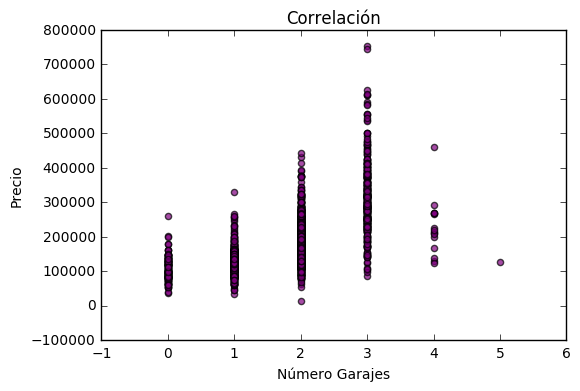

In [163]:
# Hago un scatterplot

colors = 'purple'

plt.scatter(x, y, c=colors, alpha=0.7)
plt.title('Correlación')
plt.xlabel('Número Garajes')
plt.ylabel('Precio')
plt.show()

Se puede observar que el precio y el número de garajes tienen una correlación positiva, siendo de 0.64 la misma. 
En la gráfica se puede apreciar dicha relación, al igual que las escalas son relativamente constantes a lo largo de los ejes. También se pueden ver unos cuantos outliers conforme va aumentando el número de garajes. 
Observando la gráfica, se puede concluir que hay cierta variación en el precio basado en el número de garajes. 


## (COMPLEMENTARIA) Las 10 viviendas con mejores servicios y mejor precio.

### Pista:
#### Calcula las variables: 
- Número de servicios excelentes
- Número de servicios buenos
...

#### Tendréis que tener en cuenta también variables como número de baños Full Bath, cocinas Kitchen AbvGr o dormitorios Bedroom AbvGr. Generando por ejemplo (número de estas variables por encima de media)

#### Finalmente precio de venta